# Code example 0d: HuggingFace basics

<a href="https://colab.research.google.com/github/BioGeMT/MALTAomics-Summer-School/blob/main/Day4_WorkshopVII_DeepLearningForProteinStructure/maltaomics_ex0d_huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
DATASET_PATH = '/content/drive/MyDrive/maltaomics2023/knotted_unknotted_dataset_clustered_small.csv'
HF_DATASET_NAME = 'roa7n/maltaomics_dataset_clustered'
HF_MODEL_NAME = 'Rostlab/prot_bert_bfd'

Install libraries:

In [2]:
!pip install transformers[torch] datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


Use GPU if possible:

In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


In [4]:
!nvidia-smi

Wed Sep 13 19:47:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


## 1. Load a Dataset:

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

df = pd.read_csv(DATASET_PATH)
df

,seq,label,length
0,MITTIQQIETFSKSLNKNSIDSDKNEIYDSFLDCILIIDDNNNNNN...,1,1677
1,MTIVVGFVPTPEGRAALDAAAVESRTHGESVLLVNAVSGDQRIDRR...,0,132
2,MQFLYHPDAGLPTVTVEGEAYRYIFRVRRRKSGDLIALRNLRDDYI...,1,222
3,MTQTDDADLDAGRIVRGNKTYAAFTNKELLYPVRGLSKQEIVTLLP...,0,83
4,MTLLIVVLLVLLGVALRWRRKRSAGAWAMGLGVVMGLGVGCGPVPS...,0,252
...,...,...,...
1995,MVFATATAAGWLGEGRRAEHVGFGSVLGEDGKLLRTRAGASVKPVE...,0,159
1996,MRKVLGCMRKAAQEYEMIAPGDVIGVGISGGKDSLALLYGLHLMKN...,0,240
1997,MRTIKNILVPVDIMEDNAFFVEYAKLMAEQFNAKITLLYARPLLDR...,0,151
1998,MKIQLAVICCDIRSAHNVGSIFRSCDAFGVKRLYLCGVSPWPPLKN...,1,169


Shuffle it (the positive and negative class):

In [8]:
df = df.sample(frac=1, random_state=7).reset_index(drop=True)
df

,seq,label,length
0,MSWKDNVYFVLVETKESGNIGAASRAIKNMGFTKLVLINPADLTDE...,1,252
1,MAVSRETIIQAADAINAISEFVAHEQLHTPIELRDALLGLPNDARK...,0,298
2,MSVTHRILVPFELPDADEVPPVLVDTLATMEVVLLGHYGLPEQTPP...,0,238
3,MSKARKLTFEEIFAARPTVDEVKNMPRTPLVAVVENIRSMHNVGSI...,1,178
4,MKVIVYRYGHRIERDKRMTTHVALAARAFGADGIFVDRKDEELEKR...,1,344
...,...,...,...
1995,MNIAVCLNQVPDTTTRIKIAADAQRIETGGVNFVVNPYDEYAIEEA...,0,247
1996,MSKPGQERPPLARSIRRAIGQAVESFSLILPHDRILLGLSGGKDSI...,0,258
1997,MDTKFEELKKILRGTGGVMVAFSGGVDSTFLLKVAHMVLKGRAIAL...,0,273
1998,MQIVVCIKQILDPELPARDFRIDPERKEAVKDNLPLVVNPFDLNAV...,0,267


Explore the data a bit more:

<Axes: >

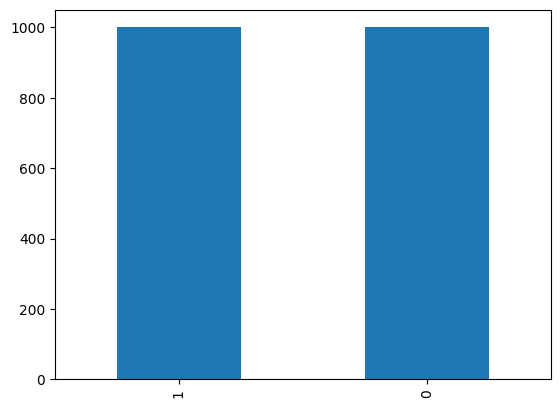

In [9]:
# is our dataset balanced?
pd.value_counts(df['label']).plot.bar()

(array([[446., 500.,  35.,   6.,   4.,   2.,   5.,   1.,   0.,   1.],
        [440., 497.,  43.,   8.,   1.,   5.,   4.,   1.,   0.,   1.]]),
 array([  73. ,  239.2,  405.4,  571.6,  737.8,  904. , 1070.2, 1236.4,
        1402.6, 1568.8, 1735. ]),
 <a list of 2 BarContainer objects>)

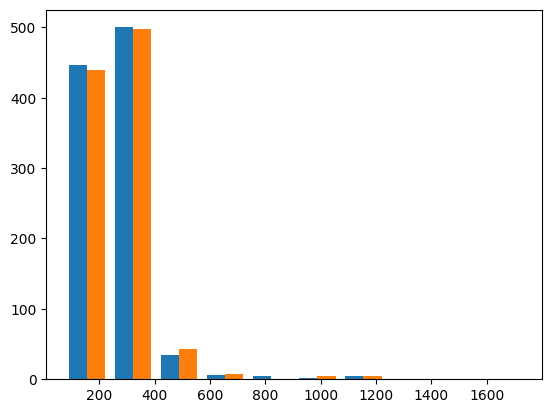

In [10]:
import matplotlib.pyplot as plt

# how is the sequence length distributed for positive vs. negative sequences?
labels = df.label.unique()
plt.hist([df.loc[df.label == x, 'length'] for x in labels], label=labels)

Split the dataset to train and test set:

In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df

,seq,label,length
968,MCDHVDNIAETSTDYPHHRLTDDRPDQVFTVRTPRIIAARKLLKSA...,1,328
240,MQRYFVNELNGIIVGDDAKHITKVMRMKINDLVIICSNNECFNARL...,1,234
819,MGRYNAASKTIAPLYIMKLDNVKKLHQKKYRQELGHCLVEGEHLVL...,1,256
692,MISSTTNKQVKFVNALVKKTKTRREEDLFVAEGLRMCSEIPKDRIH...,1,292
420,MKTKLIKIILICIAIAGIIDTIILAIRSGNVDTGILSPSIGGVFII...,0,256
...,...,...,...
1130,MYKNILVAIDGSEVGNLAFTSALHLAKAHSAQVCALYVVEYPRFYM...,0,159
1294,MTNPRAGLPVVVGIDGSDAAIRAALWAIDEAMVRSVPLRLVAALSP...,0,279
860,MTQTDDADLDAGRIVRGNKTYAAFTNKELLYPVRGLSKQEIVTLLP...,0,83
1459,MSSHEEVFIWPPPSRGLRIKVHVPASILSVEHGIVKKTFVLGLIAR...,1,295


In [12]:
train_df['label'].value_counts()

0    808
1    792
Name: label, dtype: int64

In [13]:
test_df['label'].value_counts()

1    208
0    192
Name: label, dtype: int64

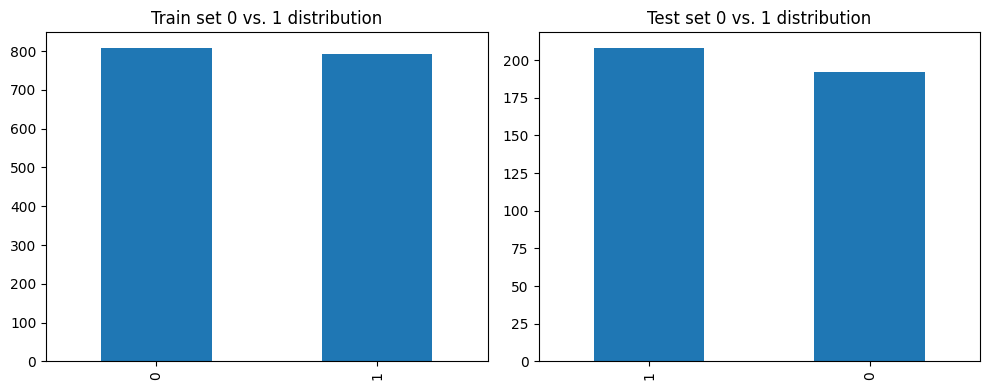

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
pd.value_counts(train_df['label']).plot.bar(ax=ax1)
ax1.title.set_text('Train set 0 vs. 1 distribution')
pd.value_counts(test_df['label']).plot.bar(ax=ax2)
ax2.title.set_text('Test set 0 vs. 1 distribution')
plt.tight_layout()

Load the DataFrames into a `DatasetDict`:

In [15]:
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict

train_dss = Dataset.from_pandas(train_df)
test_dss = Dataset.from_pandas(test_df)

dss = DatasetDict()

dss['train'] = train_dss
dss['test'] = test_dss

dss = dss.remove_columns(['__index_level_0__', 'length'])
dss

DatasetDict({
    train: Dataset({
        features: ['seq', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['seq', 'label'],
        num_rows: 400
    })
})

## 2. Upload the Dataset to the HF Hub:

In order for you to be able to upload the Dataset to HF Hub, you need to log in.

It can be done using an Access Token:

1. Click on Settings under you account:

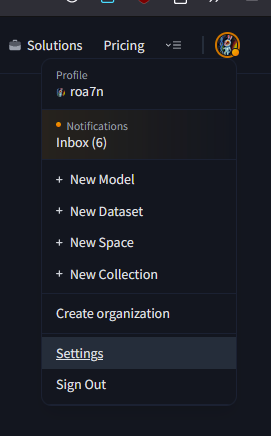

2. Create an Access Token with `write` rights and use it as input to the next cells' output:

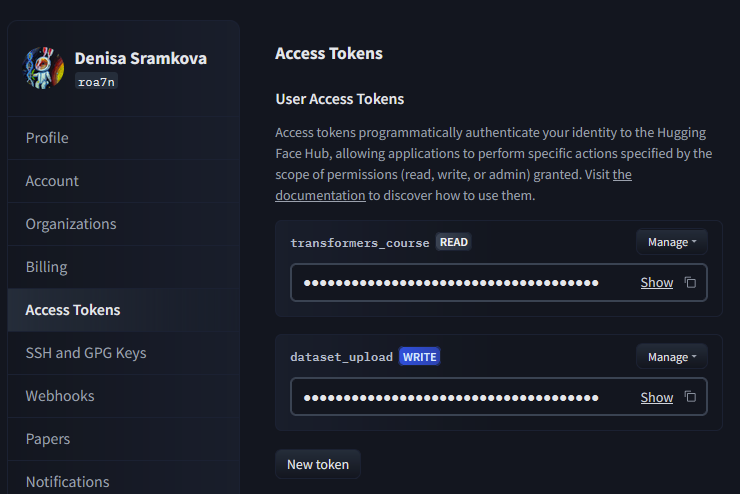

In [16]:
from huggingface_hub import notebook_login

notebook_login()

In [17]:
dss.push_to_hub(HF_DATASET_NAME)

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

After the upload finishes, you are able to load the Dataset from HF Hub:

In [18]:
from datasets import Dataset, load_dataset

##########################
# TODO: Load the Dataset #
##########################

dss = load_dataset(HF_DATASET_NAME)
dss

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['seq', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['seq', 'label'],
        num_rows: 400
    })
})

## 3. Load a Model nad Tokenizer and use it for prediction in a Pipeline:

In [19]:
###########################################################
# TODO: Load the Tokenizer and what special tokens it has #
###########################################################

from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(HF_MODEL_NAME, do_lower_case=False)
tokenizer

BertTokenizerFast(name_or_path='Rostlab/prot_bert_bfd', vocab_size=30, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [20]:
###################################################
# TODO: Load the Model and check its architecture #
###################################################

model = AutoModelForSequenceClassification.from_pretrained(HF_MODEL_NAME, num_labels=2)
model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Rostlab/prot_bert_bfd and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30, 1024, padding_idx=0)
      (position_embeddings): Embedding(40000, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-29): 30 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024,)

Use the `TextClassificationPipeline` for inference:

In [21]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)
pipe

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Why it's important to know how does the Tokenizer works:

In [22]:
pipe('DENCADENCA')

[[{'label': 'LABEL_0', 'score': 0.526884138584137},
  {'label': 'LABEL_1', 'score': 0.4731158912181854}]]

In [23]:
pipe('MCDHVDNIAETSTDYPHHRLTDDRP')

[[{'label': 'LABEL_0', 'score': 0.526884138584137},
  {'label': 'LABEL_1', 'score': 0.4731158912181854}]]

In [24]:
pipe('D E N C A D E N C A')

[[{'label': 'LABEL_0', 'score': 0.526187002658844},
  {'label': 'LABEL_1', 'score': 0.473812997341156}]]

In [25]:
pipe('M C D H V D N I A E T S T D Y P H H R L T D D R P')

[[{'label': 'LABEL_0', 'score': 0.5266388058662415},
  {'label': 'LABEL_1', 'score': 0.4733612537384033}]]

Get predictions for more sequences from our test set:

In [27]:
def splitting_function(examples):
    return {'seq': ' '.join(list(examples['seq']))}

tokenized_dss = dss.map(splitting_function, num_proc=4)
tokenized_dss.set_format('pt')
tokenized_dss

Map (num_proc=4):   0%|          | 0/1600 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['seq', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['seq', 'label'],
        num_rows: 400
    })
})

In [28]:
tokenized_dss['test'][0]

{'seq': 'M K I L V C L K Q I L D P E V S P R D F Q V D P D R L E A V L G S A S L V T N I F C E N A L E T A L Q L R E G S D S E I T A M T F G P D D A E E T L R K A F A L K V D H A Y R I A T P E I P H C N S A G A A T V L A A A I K K L G T F D L I M L G R E S G D W G E G Q T A G L V A E M L G L N C V S F V D Q I D I V D A G V H L Q R Q T D V G R E K L V S D T P V V V S I T N T E T N V P R I P K T R D I M L A H R K E L T T W T L D D I G L D E E K V T R A A N A T Q V V E L Y I P E E T S S C E F I T G D S L D D R I R E L A Q R I A N I V Q S V',
 'label': tensor(0)}

In [29]:
results = pipe(tokenized_dss['test']['seq'][:8])
len(results)

8

In [30]:
results[:5]

[[{'label': 'LABEL_0', 'score': 0.5265422463417053},
  {'label': 'LABEL_1', 'score': 0.4734577238559723}],
 [{'label': 'LABEL_0', 'score': 0.5260729193687439},
  {'label': 'LABEL_1', 'score': 0.4739270806312561}],
 [{'label': 'LABEL_0', 'score': 0.5266901850700378},
  {'label': 'LABEL_1', 'score': 0.47330984473228455}],
 [{'label': 'LABEL_0', 'score': 0.5264433026313782},
  {'label': 'LABEL_1', 'score': 0.4735566973686218}],
 [{'label': 'LABEL_0', 'score': 0.5268359780311584},
  {'label': 'LABEL_1', 'score': 0.47316402196884155}]]